In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv('C:\\Users\\Lenovo\\Downloads\\archive\\diabetes_prediction_dataset.csv')

In [3]:
def get_df_info(df):
    print("\n\033[1mShape of DataFrame:\033[0m ", df.shape)
    print("\n\033[1mColumns in DataFrame:\033[0m ", df.columns.to_list())
    print("\n\033[1mData types of columns:\033[0m\n", df.dtypes)
    
    print("\n\033[1mInformation about DataFrame:\033[0m")
    df.info()
    
    print("\n\033[1mNumber of unique values in each column:\033[0m")
    for col in df.columns:
        print(f"\033[1m{col}\033[0m: {df[col].nunique()}")
        
    print("\n\033[1mNumber of null values in each column:\033[0m\n", df.isnull().sum())
    
    print("\n\033[1mNumber of duplicate rows:\033[0m ", df.duplicated().sum())
    
    print("\n\033[1mDescriptive statistics of DataFrame:\033[0m\n",)
    
    return df.describe().transpose()

# Call the function
get_df_info(df)


Shape of DataFrame:  (100000, 9)

Columns in DataFrame:  ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']

Data types of columns:
 gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

Information about DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


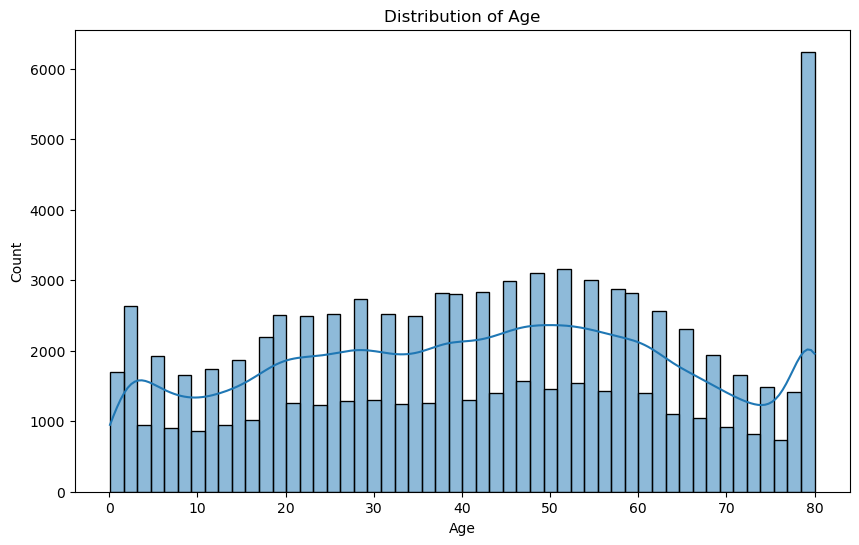

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

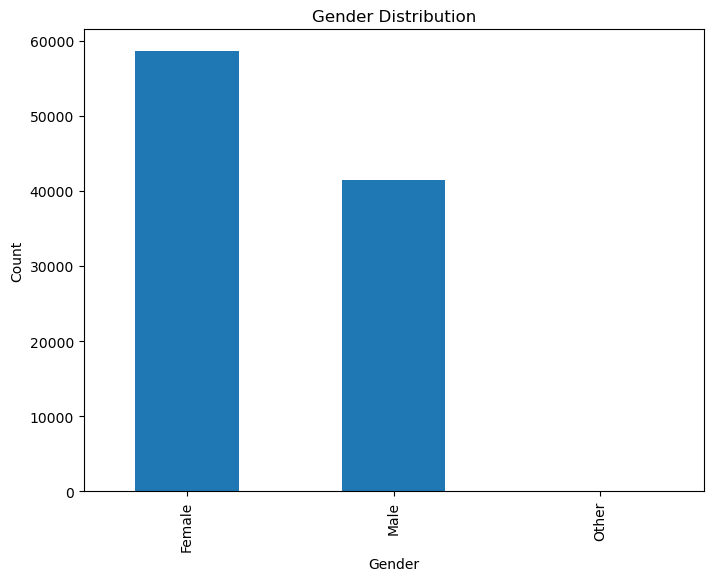

In [5]:
# Gender Distribution

plt.figure(figsize=(8, 6))
df['gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

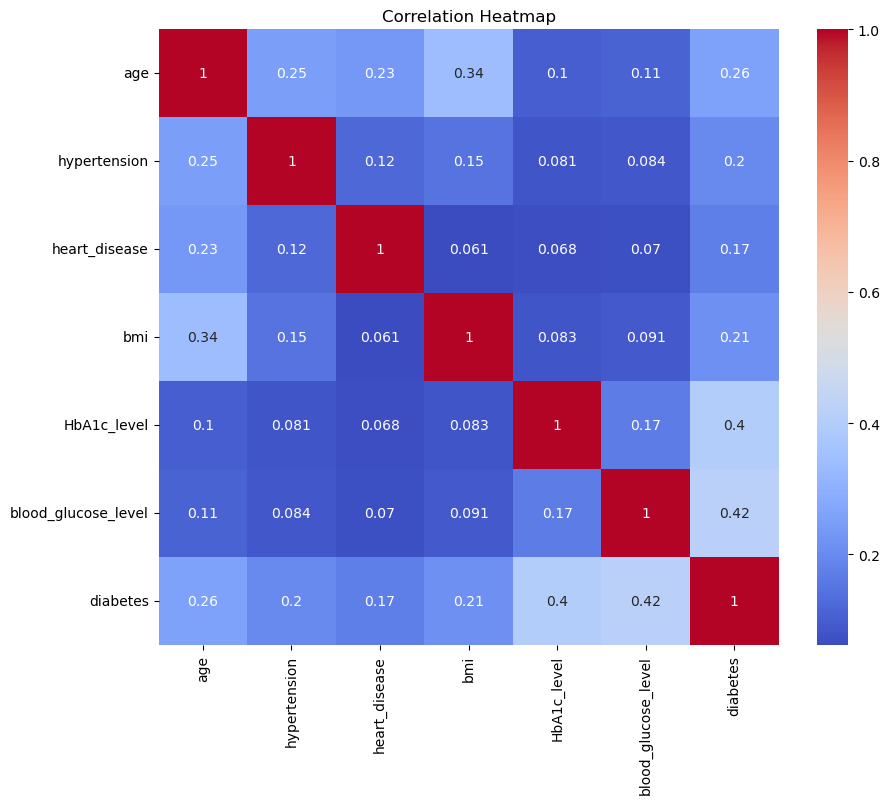

In [6]:
# Correlation Heatmap
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

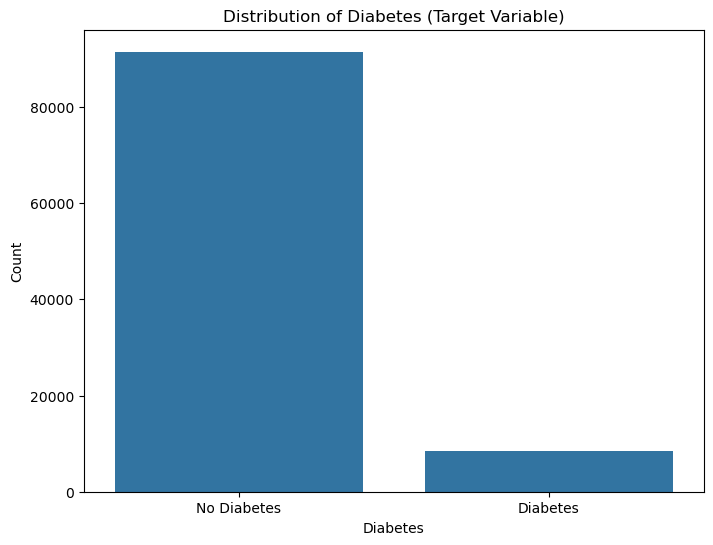

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='diabetes')
plt.title('Distribution of Diabetes (Target Variable)')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.show()

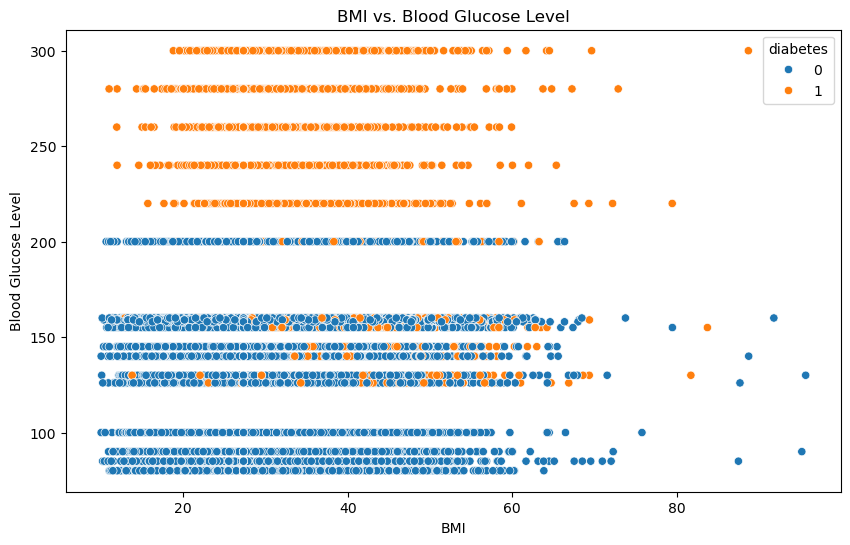

In [8]:
# BMI vs. Blood Glucose Level scatter plot, colored by diabetes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bmi', y='blood_glucose_level', hue='diabetes')
plt.title('BMI vs. Blood Glucose Level')
plt.xlabel('BMI')
plt.ylabel('Blood Glucose Level')
plt.show()

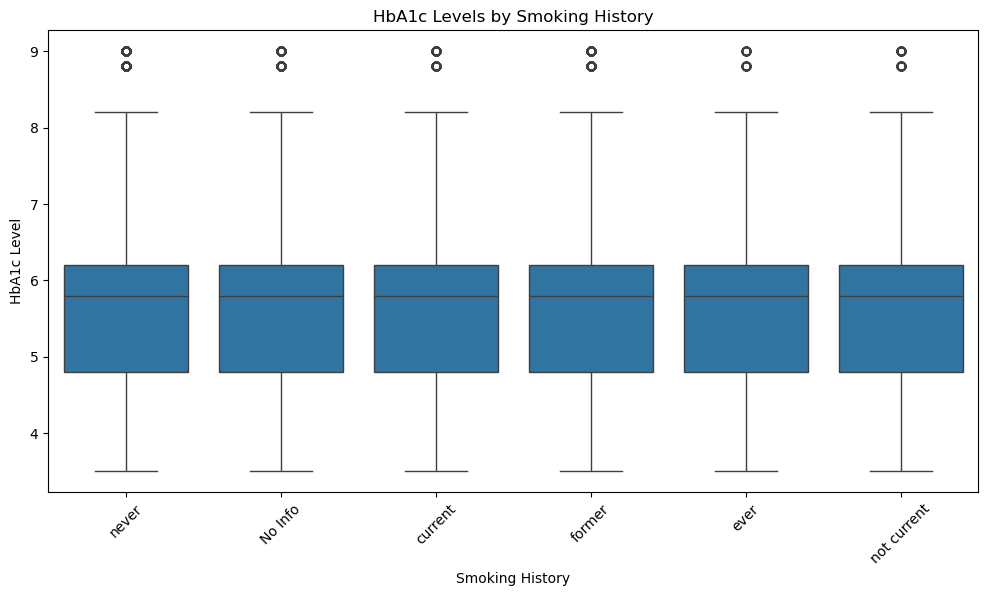

In [9]:
# Box plot of HbA1c levels by smoking history
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='smoking_history', y='HbA1c_level')
plt.title('HbA1c Levels by Smoking History')
plt.xlabel('Smoking History')
plt.ylabel('HbA1c Level')
plt.xticks(rotation=45)
plt.show()

In [10]:
#Removing the duplicate rows
df = df.drop_duplicates(keep='first')

In [11]:
# Handling categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [12]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [13]:
from imblearn.combine import SMOTETomek

# Assuming df is your original dataframe and 'diabetes' is your target column
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Initialize SMOTETomek
smote_tomek = SMOTETomek(random_state=42)

# Fit and apply the resampler to the data
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# Convert the resampled data back to a DataFrame
resampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), 
                          pd.DataFrame(y_resampled, columns=['diabetes'])], axis=1)

# Display the first few rows of the resampled dataframe
resampled_df.head()

# You might want to check the class distribution after resampling
resampled_df['diabetes'].value_counts(normalize=True)

diabetes
0    0.5
1    0.5
Name: proportion, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = resampled_df.drop(columns= 'diabetes')
y = resampled_df['diabetes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Create the base models
ada_boost = AdaBoostClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
lgbm = LGBMClassifier(random_state=42)

# Create the voting classifier
voting_clf = VotingClassifier(
    estimators = [('ada', ada_boost), ('xgb', xgb), ('lgbm', lgbm)],
    voting='soft'
)

# Fit the voting classifier
voting_clf.fit(X_train, y_train)

C:\Users\Lenovo\Desktop\Anaconda-Projects\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[LightGBM] [Info] Number of positive: 69776, number of negative: 69859
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007652 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 808
[LightGBM] [Info] Number of data points in the train set: 139635, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499703 -> initscore=-0.001189
[LightGBM] [Info] Start training from score -0.001189


VotingClassifier(estimators=[('ada', AdaBoostClassifier(random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=N...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('lgbm', LGBMClassifier(random_state=42))],
                 voting='soft')

In [17]:
# Make predictions
y_pred = voting_clf.predict(X_test)

In [18]:
# Generate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17413
           1       0.99      0.96      0.98     17496

    accuracy                           0.98     34909
   macro avg       0.98      0.98      0.98     34909
weighted avg       0.98      0.98      0.98     34909



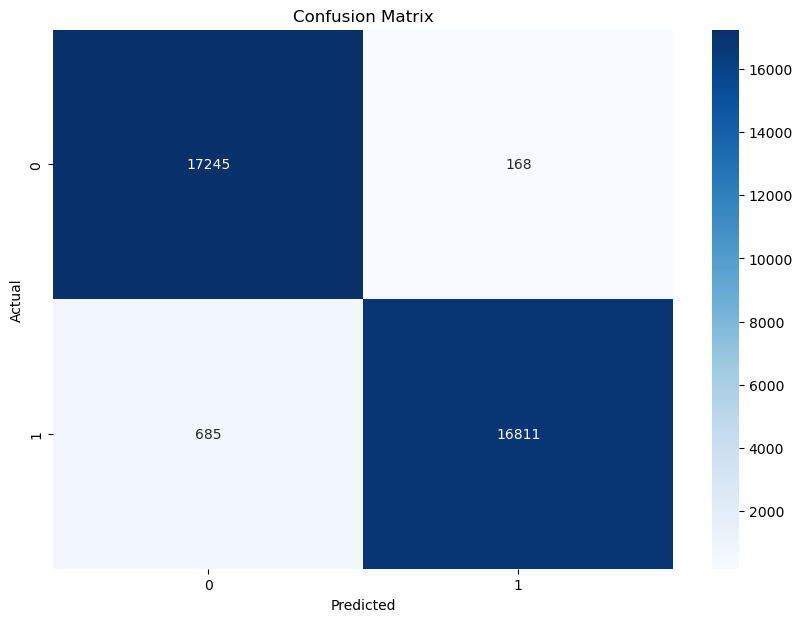

In [19]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [20]:
# Calculate and print accuracy
accuracy = np.diagonal(cm).sum() / cm.sum()
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9756


In [21]:
pip install transformers

In [22]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [23]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

# Load pre-trained GPT-2 model and tokenizer
model_name = 'gpt2'
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Ensure the pad token ID is set to the EOS token ID
tokenizer.pad_token_id = tokenizer.eos_token_id

# Function to generate additional insights or synthetic data
def generate_text(prompt):
    inputs = tokenizer.encode(prompt, return_tensors='pt')
    attention_mask = torch.ones(inputs.shape, dtype=torch.long)  # Create an attention mask

    # Generate text with adjusted parameters
    outputs = model.generate(
        inputs,
        max_length=500,
        num_return_sequences=1,
        attention_mask=attention_mask,
        do_sample=True,  # Enable sampling
        temperature=0.7,  # Control the randomness of predictions
        top_k=50,  # Limits the next token predictions to the top K tokens
        top_p=0.95,  # Nucleus sampling (select tokens with cumulative probability up to this value)
        repetition_penalty=1.2,  # Penalize repeated tokens
        pad_token_id=tokenizer.eos_token_id  # Explicitly set the pad token ID
    )
    text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return text

# Example usage
prompt = "Factors influencing diabetes prediction include various aspects such as age, BMI, blood pressure, and other important metrics. Specifically, some of the key factors are:"
generated_text = generate_text(prompt)
print(generated_text)

Factors influencing diabetes prediction include various aspects such as age, BMI, blood pressure, and other important metrics. Specifically, some of the key factors are:
1) Blood sugar control is a relatively recent phenomenon in which people have been using insulin for at least one year (typically three). In fact there has never been an epidemic based on this time frame before; we know that many older adults will continue to use their daily glucose levels up until they reach normal weight with no risk due from overuse or deficiency [17]. Furthermore, even if you do not receive any dietary advice regarding your intake during these two years period, fasting periods provide plenty more opportunities than ever prior when children require extra nutrients – particularly calcium because it occurs naturally while still young! The longer-term benefits were achieved through improved metabolic efficiency by keeping energy metabolism constant throughout childhood without excessive carbohydrate co

In [24]:
def evaluate_parameter(parameter_name, parameter_value):
    # Construct the prompt
    prompt = f"The {parameter_name} is {parameter_value}. Is this considered good or bad for predicting diabetes? Please provide an explanation."
    
    # Generate a response
    inputs = tokenizer.encode(prompt, return_tensors='pt')
    attention_mask = torch.ones(inputs.shape, dtype=torch.long)  # Create an attention mask

    outputs = model.generate(
        inputs,
        max_length=500,  # Adjust if needed for longer responses
        num_return_sequences=1,
        attention_mask=attention_mask,
        do_sample=True,  # Enable sampling
        temperature=0.7,  # Control the randomness of predictions
        top_k=50,  # Limits the next token predictions to the top K tokens
        top_p=0.95,  # Nucleus sampling (select tokens with cumulative probability up to this value)
        repetition_penalty=1.2,  # Penalize repeated tokens
        pad_token_id=tokenizer.eos_token_id  # Explicitly set the pad token ID
    )
    
    text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return text

# Example usage
parameter_name = "BMI"
parameter_value = 28  # Example user inputZ
evaluation = evaluate_parameter(parameter_name, parameter_value)
print(evaluation)


The BMI is 28. Is this considered good or bad for predicting diabetes? Please provide an explanation.
 (See "How do I tell if my blood sugar has gone up?").


In [ ]:
def finalprediction(input_data):
    columns = ["gender", "age", "hypertension", "heart_disease", "smoking_history", "bmi", "HbA1c_level", "blood_glucose_level"]


# Convert the input data to a DataFrame with the correct column names
    input_data_df = pd.DataFrame(input_data, columns=columns)
    y_pred = voting_clf.predict(input_data_df)
    print(f"Predicted output: {y_pred}")
    return y_pred
# If the model output is binary (0: Non-diabetic, 1: Diabetic)
    #result = "Diabetic" if y_pred[0] == 1 else "Non-diabetic"
    #print(f"Prediction: {result}")

In [26]:
finalprediction(input_data)

NameError: name 'input_data' is not defined